## Read Data

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
import ast
import cv2

video = "source_material/streetVideos/seattle1.mp4"
cap = cv2.VideoCapture(video)

if (cap.isOpened()== False): 
  raise Exception("Error opening video stream or file")

fps = int(cap.get(cv2.CAP_PROP_FPS))

bbDists = load("results/bbox_distances/euclidean/bbox_distances1")
bbDists = ast.literal_eval(bbDists)
data = load("results/velocities/euclidean/velocities1")
spotVelocities = load("results/spot_velocities/euclidean/spot_velocities1")


all_samples = data.values()
all_bbs = bbDists.values()

all_lengths = list(map(lambda arr: len(arr), all_samples))

videoDir = "results/plots_tables/euclidean/video1"
os.mkdir(videoDir)

 **Get Number of registered objects and info about velocities registered**

Number of registered objects: 212
Mean number of samples per object: 150.75471698113208
Median number of samples per object: 17.0
STD of samples per object: 1269.9890863542419



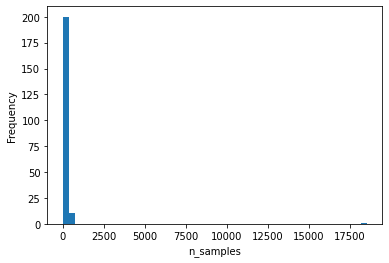

In [5]:
print(f"Number of registered objects: {len(all_lengths)}")
print(f"Mean number of samples per object: {np.mean(all_lengths)}")
print(f"Median number of samples per object: {np.median(all_lengths)}")
print(f"STD of samples per object: {np.std(all_lengths)}")
print()

_ = plt.hist(all_lengths, bins=50)
_ = plt.xlabel("n_samples")
_ = plt.ylabel("Frequency")
plt.savefig(f"{videoDir}/samplesPerObject.jpg")

**Let's see in general how are the velocities registered** 

Or is it better to watch this over a random sample of n vehicles?

Number of registered speeds: 31960
Mean velocity: 57.98459647237006
Median velocity: 32.49161462272836
velocity STD: 94.78314292900423
portion of samples with speed > 70: 0.20510012515644555
portion of samples with speed > 100: 0.1468397997496871



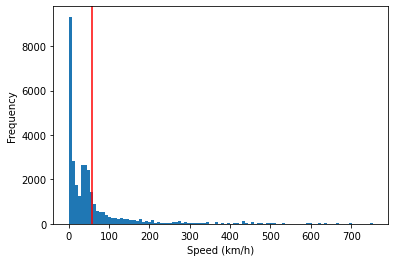

In [23]:
all_samples_concat = np.hstack(list(all_samples))
print(f"Number of registered speeds: {len(all_samples_concat)}")
print(f"Mean velocity: {np.mean(all_samples_concat)}")
print(f"Median velocity: {np.median(all_samples_concat)}")
print(f"velocity STD: {np.std(all_samples_concat)}")
print(f"portion of samples with speed > 70: {len(all_samples_concat[all_samples_concat > 70])/len(all_samples_concat)}")
print(f"portion of samples with speed > 100: {len(all_samples_concat[all_samples_concat > 100])/len(all_samples_concat)}")
print()

_ = plt.hist(all_samples_concat, bins=100, density=False)
_ = plt.axvline(x=np.mean(all_samples_concat), color='red')
plt.xlabel("Speed (km/h)")
plt.ylabel("Frequency")
plt.savefig(f"{videoDir}/SpeedDistribution.jpg")

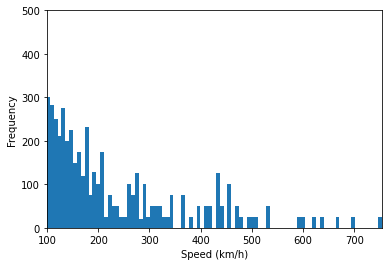

In [24]:
_ = plt.hist(all_samples_concat, bins=100, density=False)
_ = plt.xlim((100,max(all_samples_concat)))
_ = plt.ylim((0, 500))
plt.xlabel("Speed (km/h)")
plt.ylabel("Frequency")
plt.savefig(f"{videoDir}/SpeedDistributionZoomed.jpg")

**Get top 10 objects with the most samples**

In [12]:
sorted_samples = sorted(all_samples, reverse=True, key=lambda arr: len(arr))[:10]
sorted_lens = list(map(lambda arr: len(arr), sorted_samples))
inds = [list(map(lambda t: t*25/fps,range(len(sorted_sample)))) for sorted_sample in sorted_samples]

sorted_bbs = sorted(all_bbs, reverse=True, key=lambda arr: len(arr))[:10]
sorted_lens_bb = list(map(lambda arr: len(arr), sorted_bbs))
median_lens_bb, std_lens_bb = np.median(sorted_lens_bb), np.std(sorted_lens_bb)
inds_bbs = [range(len(sorted_bb)) for sorted_bb in sorted_bbs]

**Plot velocities for those objects**

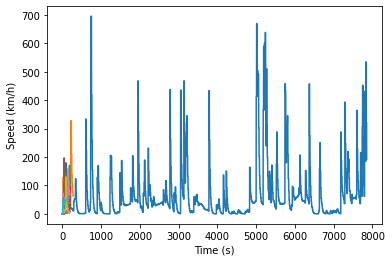

In [13]:
for i in range(len(inds)):
    _ = plt.plot(inds[i], sorted_samples[i] )
_ = plt.xlabel("Time (s)")
_ = plt.ylabel("Speed (km/h)")
plt.savefig(f"{videoDir}/SpeedTimeSeries.jpg")

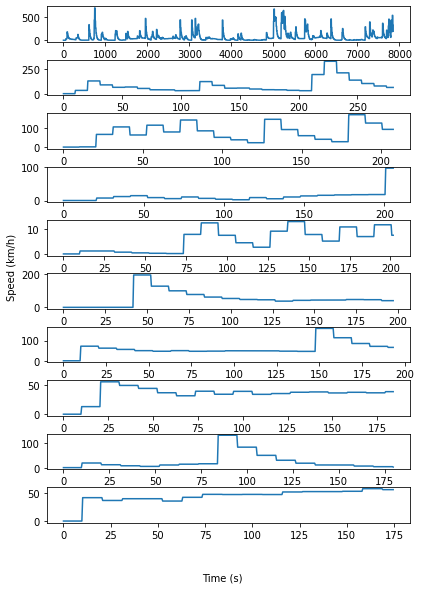

In [17]:
f, ax = plt.subplots(len(inds), 1, sharex=False, sharey=False)
for i in range(len(inds)):
    ax[i].plot(inds[i], sorted_samples[i])
f.text(0.5, 0.04, 'Time (s)', ha='center')
f.text(0.04, 0.5, 'Speed (km/h)', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0.5)
f.set_size_inches(6.5, 9.5)
plt.savefig(f"{videoDir}/multiPlotTimeSeries.jpg")

**Check for the change in bounding box size**

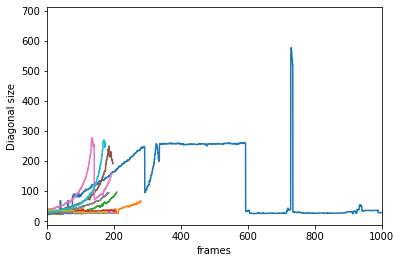

In [18]:
for i in range(len(inds)):
    _ = plt.plot(inds[i], sorted_bbs[i], )
    _ = plt.xlim(0, 1000)
_ = plt.xlabel("frames")
_ = plt.ylabel("Diagonal size")
plt.savefig(f"{videoDir}/bbDistTimeSeries.jpg")

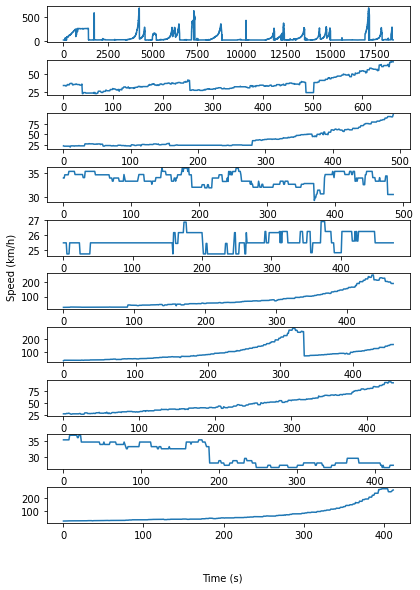

In [20]:
f, ax = plt.subplots(len(inds_bbs), 1, sharex=False, sharey=False)
for i in range(len(inds_bbs)):
    ax[i].plot(inds_bbs[i], sorted_bbs[i])
f.text(0.5, 0.04, 'Time (s)', ha='center')
f.text(0.04, 0.5, 'Speed (km/h)', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0.5)
f.set_size_inches(6.5, 9.5)
plt.savefig(f"{videoDir}/multiPlotBBsTimeSeries.jpg")

** Let's have a better picture of the variability of every object**

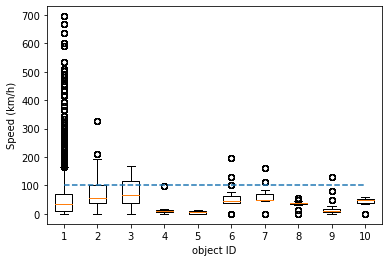

In [28]:
fig, ax = plt.subplots()
_ = ax.boxplot(np.array(sorted_samples, dtype=object))
_ = plt.plot(range(1,11), [100]*10, '--')
_ = ax.set_xlabel("Object ID")
_ = ax.set_ylabel("Speed (km/h)")
plt.savefig(f"{videoDir}/speedBoxPlots.jpg")

Number of registered objects: 51
Mean velocity: 83.09934551962357
Median velocity: 43.49778776527886
STD of velocities: 96.32937672322419



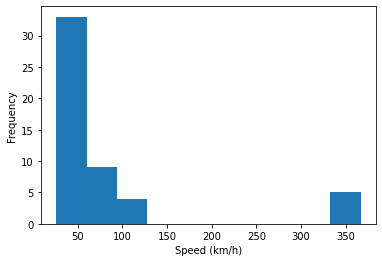

In [22]:
print(f"Number of registered objects: {len(spotVelocities)}")
print(f"Mean velocity: {np.mean(spotVelocities)}")
print(f"Median velocity: {np.median(spotVelocities)}")
print(f"STD of velocities: {np.std(spotVelocities)}")
print()

_ = plt.hist(spotVelocities, bins=10)
_ = plt.xlabel("Speed (km/h)")
_ = plt.ylabel("Frequency")
plt.savefig(f"{videoDir}/bbDistBoxPlots.jpg")
plt.savefig(f"{videoDir}/SpeedLineDistribution.jpg")